In [2]:
#Modules for data analysis
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from scipy.stats import chi2_contingency, spearmanr

In [3]:
#Modules for reading and wrting data
import csv

In [4]:
#Modules for plotting and data visulisation
import matplotlib.pyplot as plt
#Not sure if it will be used but imported in case required
import seaborn as sns

%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
#Create some dictionaries and lists
responses = {}
fidelity_ratings = {}
intelligibility_ratings = {}
fidelity_avg_ratings = {}
within_q_fidelity_avg_ratings = []
fidelity_std_ratings = {}
within_q_fidelity_std_ratings = []
intelligibility_avg_ratings = {}
within_q_intelligibility_avg_ratings = []
intelligibility_std_ratings = {}
within_q_intelligibility_std_ratings = []
complexity_ratings = []

In [6]:
#Use csv to open and read the contents of the file
with open('/content/drive/My Drive/Colab Notebooks/2020_Intern_12__T​RI01_Comp/2020_08-03_2020_Intern_12_TRI01_Comp_Parameter_v01.csv') as csv_file:
    csv_read = csv.reader(csv_file,delimiter=',')
    for i,row in enumerate(csv_read):
        responses[str(i)] = row

In [7]:
#Checking
#print(responses)

In [8]:
#Store fidelity ratings
for i in responses:
    #First two rows are commas and qeustions (not ratings)
    if (int(i) < 2):
        pass
    else:
        fidelity_ratings[str(int(i)-2)] = responses[i][:6]



In [9]:
#Checking
#print(fidelity_ratings)

In [10]:
#Store intelligiblity ratings
for i in responses:
    #First two rows are commas and qeustions (not ratings)
    if (int(i) < 2):
        pass
    else:
        intelligibility_ratings[str(int(i)-2)] = responses[i][6:9]


In [11]:
#Checking
#print(intelligibility_ratings)

In [12]:
#Store complexity ratings
for i in responses:
    #First two rows are commas and qeustions (not ratings)
    if (int(i) < 2):
        pass
    else:
        complexity_ratings.append(int(responses[i][9]))

In [13]:
#Checking
#print(complexity_ratings)

In [14]:
#Compute the mean and standard deviation of the complexity ratings
complexity_mean = np.mean(complexity_ratings)
complexity_std = np.std(complexity_ratings)
print("Overall complexity avg and std dev: %f and %f"  %(complexity_mean,complexity_std))

Overall complexity avg and std dev: 1.067515 and 0.867065


In [15]:
#Currently, ratings are strings which are not very useful to work with - convert to int

for key in fidelity_ratings:
    fidelity_ratings[key] = [int(i) for i in fidelity_ratings[key]]

for key in intelligibility_ratings:
    intelligibility_ratings[key] = [int(i) for i in intelligibility_ratings[key]]


#Checking
#print(fidelity_ratings)
#print(intelligibility_ratings)

In [16]:
#The next section deals with per question averages and standard deviations

In [17]:
#The following code is used to find the avg per question fidelity and intelligibility ratings
for key in fidelity_ratings:
    fidelity_avg_ratings[key] = np.mean(fidelity_ratings[key])

for key in intelligibility_ratings:
    intelligibility_avg_ratings[key] = np.mean(intelligibility_ratings[key])

#Checking
#print(fidelity_avg_ratings)
#print(intelligibility_avg_ratings)

In [18]:
#The following code is used to find the standard deviation per question fidelity and intelligibility ratings
for key in fidelity_ratings:
    fidelity_std_ratings[key] = np.std(fidelity_ratings[key])

for key in intelligibility_ratings:
    intelligibility_std_ratings[key] = np.std(intelligibility_ratings[key])

#Checking
#print(fidelity_std_ratings)
#print(intelligibility_std_ratings)

In [19]:
#Overall mean to match reported ones (they don't match because qeustions mislabelled - easy fix though - change :6 and 6:9 to :3 and 3:9 in which case they do match)
overall_fidelity_avg = np.mean([fidelity_avg_ratings[i] for i in fidelity_avg_ratings])
overall_intelligibility_avg = np.mean([intelligibility_avg_ratings[i] for i in intelligibility_avg_ratings])

print("Overall fidelity and intelligibility avgs: %f and %f"  %(overall_fidelity_avg, overall_intelligibility_avg))

Overall fidelity and intelligibility avgs: 3.010763 and 2.837573


In [20]:
#Overall std to match reported ones (same issue and solution)
overall_fidelity_std = np.mean([fidelity_std_ratings[i] for i in fidelity_std_ratings])
overall_intelligibility_std = np.mean([intelligibility_std_ratings[i] for i in intelligibility_std_ratings])

print("Overall fidelity and intelligibility std devs: %f and %f"  %(overall_fidelity_std, overall_intelligibility_std))

Overall fidelity and intelligibility std devs: 0.509967 and 0.402510


In [21]:
#The next section deals with within question averages and standard deviations (has same issue and solution)

In [22]:
#Within question fidelity and intelligibility avgs - these will match the overall ones
within_q_fidelity_avg_ratings = [np.mean([fidelity_ratings[key][i] for key in fidelity_ratings]) for i in range(len(fidelity_ratings[key]))]
within_q_intelligibility_avg_ratings = [np.mean([intelligibility_ratings[key][i] for key in intelligibility_ratings]) for i in range(len(intelligibility_ratings[key]))]

within_q_fidelity_avg = np.mean(within_q_fidelity_avg_ratings)
within_q_intelligibility_avg = np.mean(within_q_intelligibility_avg_ratings)

print("Question-wise fidelity and intelligibility avgs: %f and %f"  %(within_q_fidelity_avg, within_q_intelligibility_avg))

Question-wise fidelity and intelligibility avgs: 3.010763 and 2.837573


In [23]:
#Within question fidelity and intelligibility std devs- these will not match the overall ones as spread over a 1000 as compared to every 5 entries
#This shows how there is a lower spread in rating by a particular indvidual as compared to over a group

within_q_fidelity_std_ratings = [np.std([fidelity_ratings[key][i] for key in fidelity_ratings]) for i in range(len(fidelity_ratings[key]))]
within_q_intelligibility_std_ratings = [np.std([intelligibility_ratings[key][i] for key in intelligibility_ratings]) for i in range(len(intelligibility_ratings[key]))]

within_q_fidelity_std = np.mean(within_q_fidelity_std_ratings)
within_q_intelligibility_std = np.mean(within_q_intelligibility_std_ratings)

print("Question-wise fidelity and intelligibility std devs: %f and %f"  %(within_q_fidelity_std, within_q_intelligibility_std))

Question-wise fidelity and intelligibility std devs: 1.001684 and 1.034203


In [24]:
#lists for fidelity and intelligibility are created

x1 = list(fidelity_avg_ratings.values())
x2 = list(intelligibility_avg_ratings.values())
y = complexity_ratings

#Checking
#print(x1)
#print(x2)



In [25]:
#as per research, the correlation coefficients and R^2 are found

#firstly, the PMCC is found for the different pairs

pmcc_matrix = np.corrcoef([x1,x2,y])

#Checking
#print(pmcc_matrix)

print("Fidelity and complexity PMCC: %f, intelligibility and complexity PMCC: %f, fidelity and intelligibility PMCC : %f"  %(pmcc_matrix[0][2], pmcc_matrix[1][2], pmcc_matrix[0][1]))

Fidelity and complexity PMCC: -0.890427, intelligibility and complexity PMCC: -0.841890, fidelity and intelligibility PMCC : 0.785142


In [26]:
#next, the cramer's V coefficients are found 

chi_squared_fid_comp = chi2_contingency([x1,y])[0]
#if treated as a table, there are rows equal to the number of responses and 2 columns; so 2 is the minimum
V_fid_comp = np.sqrt(chi_squared_fid_comp/(len(x1)*2))

chi_squared_int_comp = chi2_contingency([x2,y])[0]
V_int_comp = np.sqrt(chi_squared_int_comp/(len(x2)*2))

chi_squared_fid_int = chi2_contingency([x1,x2])[0]
V_fid_int = np.sqrt(chi_squared_fid_int/(len(x2)*2))

print("Fidelity and complexity Cramer's V: %f, intelligibility and complexity Cramer's V: %f, fidelity and intelligibility Cramer's V: %f" %(V_fid_comp,V_int_comp, V_fid_int))

Fidelity and complexity Cramer's V: 0.660060, intelligibility and complexity Cramer's V: 0.679231, fidelity and intelligibility Cramer's V: 0.184076


In [27]:
#lastly, the Spearman's rank coefficients can be calculated

Spearman_fid_comp = spearmanr(x1,y)[0]
Spearman_int_comp = spearmanr(x2,y)[0]
Spearman_fid_int = spearmanr(x1,x2)[0]

print("Fidelity and complexity Spearman's rank coefficient: %f, intelligibility and complexity Spearman's rank coefficient: %f, fidelity and intelligibility Spearman's rank coefficient: %f" %(Spearman_fid_comp,Spearman_int_comp,Spearman_fid_int))

#It is a good sign (check) that the Spearman rank coeffs. and the PMCCs are similar

Fidelity and complexity Spearman's rank coefficient: -0.886874, intelligibility and complexity Spearman's rank coefficient: -0.837217, fidelity and intelligibility Spearman's rank coefficient: 0.780897


In [28]:
#R^2 values to be calculated to examine multi-collinearity

x_fid = np.array(x1).reshape(-1, 1)
x_int = np.array(x2).reshape(-1, 1)

linear_model_fid_comp = LinearRegression().fit(x_fid,y)

linear_model_int_comp = LinearRegression().fit(x_int,y)

print("Fidelity effect on complexity R^2: %f, intelligibility effect on complexity R^2: %f "  %(linear_model_fid_comp.score(x_fid,y),linear_model_int_comp.score(x_int,y)))



Fidelity effect on complexity R^2: 0.792861, intelligibility effect on complexity R^2: 0.708778 


In [29]:
print("Simple linear regression - Fidelity (x1) and complexity (y) model y = %f*x1 + %f, Intelligibility (x2) and complexity (y) model y = %f*x2 + %f" %(linear_model_fid_comp.coef_,linear_model_fid_comp.intercept_,linear_model_int_comp.coef_,linear_model_int_comp.intercept_))

Simple linear regression - Fidelity (x1) and complexity (y) model y = -0.985088*x1 + 4.033382, Intelligibility (x2) and complexity (y) model y = -0.834663*x2 + 3.435932


In [30]:
#While the intelligibility R^2 value is less than 0.75 which means that multi-collinearity is likely not an issue, it is still close (0.7) and so, a multiple regression model can still be created

x_inputs = [[i,j] for i,j in zip(x1,x2)]

#Checking
#print(x_inputs)

# m_l_r_m_f_c  stands for multiple_linear_regression_model_for_comp 
m_l_r_m_f_c = LinearRegression().fit(x_inputs,y)

print("Multiple linear regression overall model for complexity - Fidelity (x1), Intelligibility (x2), Complexity (y), y = %f*x1 (+) %f*x2 + %f, R^2 value is %f" %(m_l_r_m_f_c.coef_[0],m_l_r_m_f_c.coef_[1],m_l_r_m_f_c.intercept_,m_l_r_m_f_c.score(x_inputs,y)))

Multiple linear regression overall model for complexity - Fidelity (x1), Intelligibility (x2), Complexity (y), y = -0.661747*x1 (+) -0.369056*x2 + 4.107102, R^2 value is 0.846010


In [31]:
#Now, the graphs of the different variables will be plotted 

<Figure size 432x288 with 0 Axes>

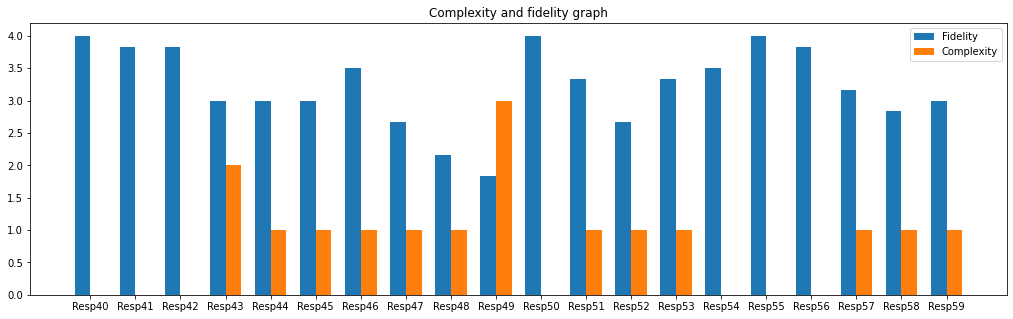

In [32]:
#A scatter or line plot does not provide much information as the data is discrete rather than continuous
#Thus, a sample of the total population is plotted as a bar graph
plt.figure(1)
plt.figure(figsize = (17.5,5))
plt.title("Complexity and fidelity graph")
N = 20
width = 0.35
indexing = np.arange(0,N,1)
plt.bar(indexing, x1[40:60],width, label = "Fidelity")
plt.bar(indexing + width, y[40:60],width, label = "Complexity")
plt.xticks(indexing+width/2,['Resp' + str(i) for i in range(40,60)])
plt.legend(loc = 'best')
plt.show()

<Figure size 432x288 with 0 Axes>

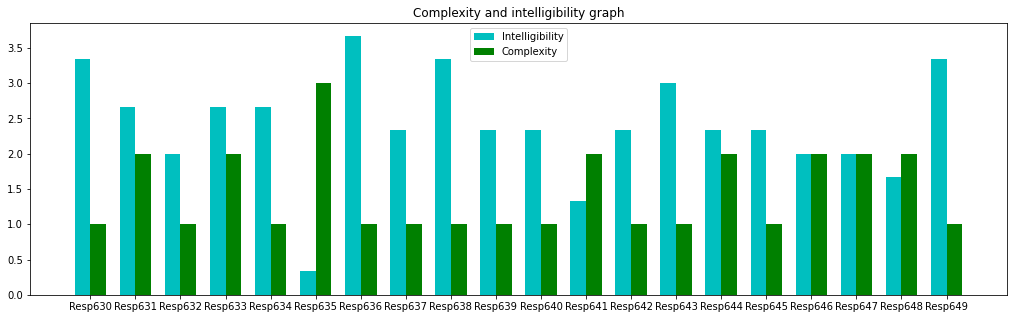

In [33]:
plt.figure(2)
plt.figure(figsize = (17.5,5))
plt.title("Complexity and intelligibility graph")
N = 20
width = 0.35
indexing = np.arange(0,N,1)
plt.bar(indexing, x2[630:650],width, label = "Intelligibility", color = 'c')
plt.bar(indexing + width, y[630:650],width, label = "Complexity", color = 'g')
plt.xticks(indexing+width/2,['Resp' + str(i) for i in range(630,650)])
plt.legend(loc = 'best')
plt.show()

<Figure size 432x288 with 0 Axes>

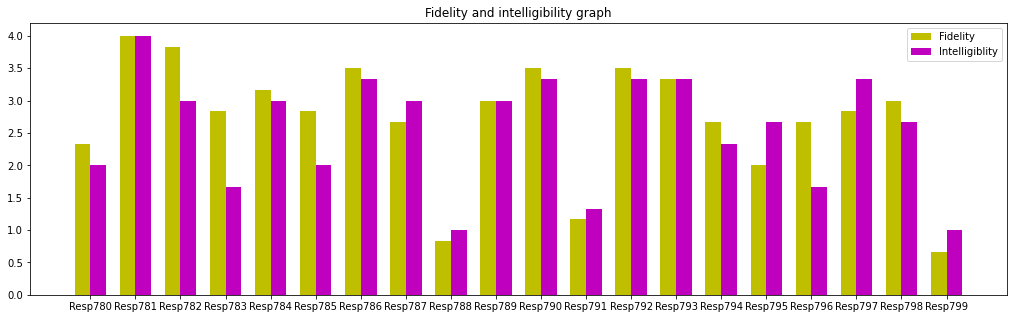

In [34]:
plt.figure(3)
plt.figure(figsize = (17.5,5))
plt.title("Fidelity and intelligibility graph")
N = 20
width = 0.35
indexing = np.arange(0,N,1)
plt.bar(indexing, x1[780:800],width, label = "Fidelity", color = 'y')
plt.bar(indexing + width, x2[780:800],width, label = "Intelligiblity", color = 'm')
plt.xticks(indexing+width/2,['Resp' + str(i) for i in range(780,800)])
plt.legend(loc = 'best')
plt.show()

In [35]:
#Below is the code for a scatter plot - it can be uncommented
#plt.scatter(x1,y)
#plt.xlabel("Fidelity")
#plt.ylabel("Complexity")
#plt.show()

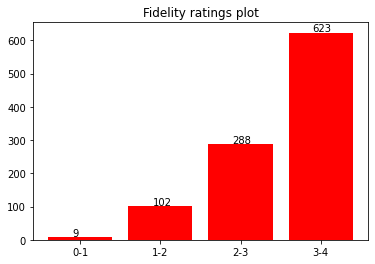

In [36]:
#For total population statistics visualisation
plt.title("Fidelity ratings plot")
dict_of_vals_fid = {"0-1": len([i for i in x1 if (i >= 0 and i < 1)]), "1-2": len([i for i in x1 if (i >= 1 and i < 2)]), "2-3": len([i for i in x1 if (i >= 2 and i < 3)]), "3-4": len([i for i in x1 if (i >= 3 and i <= 4)])}
index = np.arange(0,4,1)
plt.bar(index,list(dict_of_vals_fid.values()), color = 'r')
plt.xticks(index,labels = list(dict_of_vals_fid.keys()))
for no,value in enumerate(list(dict_of_vals_fid.values())):
  plt.text(index[no]-0.1, no+value+2, str(value))
plt.show()

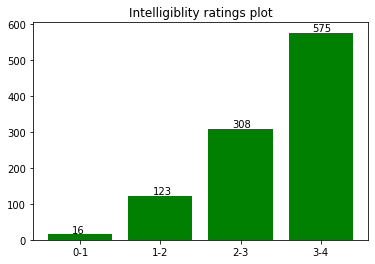

In [37]:
plt.title("Intelligiblity ratings plot")
dict_of_vals_int = {"0-1": len([i for i in x2 if (i >= 0 and i < 1)]), "1-2": len([i for i in x2 if (i >= 1 and i < 2)]), "2-3": len([i for i in x2 if (i >= 2 and i < 3)]), "3-4": len([i for i in x2 if (i >= 3 and i <= 4)])}
index = np.arange(0,4,1)
plt.bar(index,list(dict_of_vals_int.values()), color = 'g')
plt.xticks(index, labels = list(dict_of_vals_int.keys()))
for no,value in enumerate(list(dict_of_vals_int.values())):
  plt.text(index[no]-0.1, no+value+2, str(value))
plt.show()

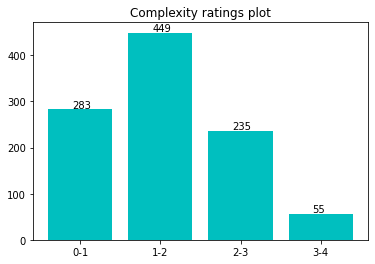

In [38]:
plt.title("Complexity ratings plot")
dict_of_vals_comp = {"0-1": len([i for i in y if (i >= 0 and i < 1)]), "1-2": len([i for i in y if (i >= 1 and i < 2)]), "2-3": len([i for i in y if (i >= 2 and i < 3)]), "3-4": len([i for i in y if (i >= 3 and i <= 4)])}
index = np.arange(0,4,1)
plt.bar(index,list(dict_of_vals_comp.values()), color = 'c')
plt.xticks(index, labels = list(dict_of_vals_comp.keys()))
for no,value in enumerate(list(dict_of_vals_comp.values())):
  plt.text(index[no]-0.1, no+value+2, str(value))
plt.show()

In [ ]:
line0 = " "
line1 = "Overall complexity avg and std dev: %f and %f"  %(complexity_mean,complexity_std)
line2 = "Overall fidelity and intelligibility avgs: %f and %f"  %(overall_fidelity_avg, overall_intelligibility_avg)
line3 = "Overall fidelity and intelligibility std devs: %f and %f"  %(overall_fidelity_std, overall_intelligibility_std)
line4 = "Question-wise fidelity and intelligibility avgs: %f and %f"  %(within_q_fidelity_avg, within_q_intelligibility_avg)
line5 = "Question-wise fidelity and intelligibility std devs: %f and %f"  %(within_q_fidelity_std, within_q_intelligibility_std)
line6 = "Fidelity and complexity PMCC: %f  intelligibility and complexity PMCC: %f  fidelity and intelligibility PMCC : %f"  %(pmcc_matrix[0][2], pmcc_matrix[1][2], pmcc_matrix[0][1])
line7 = "Fidelity and complexity Cramer's V: %f   intelligibility and complexity Cramer's V: %f   fidelity and intelligibility Cramer's V: %f" %(V_fid_comp,V_int_comp, V_fid_int)
line8 = "Fidelity and complexity Spearman's rank coefficient: %f   intelligibility and complexity Spearman's rank coefficient: %f   fidelity and intelligibility Spearman's rank coefficient: %f" %(Spearman_fid_comp,Spearman_int_comp,Spearman_fid_int)
line9 = "Fidelity effect on complexity R^2: %f   intelligibility effect on complexity R^2: %f "  %(linear_model_fid_comp.score(x_fid,y),linear_model_int_comp.score(x_int,y))
line10 = "Simple linear regression - Fidelity (x1) and complexity (y) model y = %f*x1 + %f    Intelligibility (x2) and complexity (y) model y = %f*x2 + %f" %(linear_model_fid_comp.coef_,linear_model_fid_comp.intercept_,linear_model_int_comp.coef_,linear_model_int_comp.intercept_)
line11 = "Multiple linear regression overall model for complexity - Fidelity (x1)  Intelligibility (x2)  Complexity (y)   y = %f*x1 (+) %f*x2 + %f   R^2 value is %f" %(m_l_r_m_f_c.coef_[0],m_l_r_m_f_c.coef_[1],m_l_r_m_f_c.intercept_,m_l_r_m_f_c.score(x_inputs,y))
lines = [line0,line1,line2,line3,line4,line5,line6,line7,line8,line9,line10,line11]

In [ ]:
found = []
with open('/content/drive/My Drive/Colab Notebooks/2020_Intern_12__T​RI01_Comp/2020_08-03_2020_Intern_12_TRI01_Comp_Parameter_v02.csv', mode ='r') as csv_file0:
  list_of_lines = csv_file0.readlines()
  for line in lines:
      if (line + "\n") in list_of_lines:
        found.append(True)
      else:
        found.append(False)

#Checking
#print(found)

In [ ]:
with open('/content/drive/My Drive/Colab Notebooks/2020_Intern_12__T​RI01_Comp/2020_08-03_2020_Intern_12_TRI01_Comp_Parameter_v02.csv', mode = 'a') as csv_file1:
    stats_info = csv.writer(csv_file1)
    
    if True in found:
      pass
    else:
      stats_info.writerows(line.split(',') for line in lines)
    
    csv_file1.close()